# Assignment #5: Probability and Bootstrapping
## Foundations of Machine Learning
## ` ! git clone https://www.github.com/DS3001/the_bootstrap`
## Do two.

**Q1.** A die is fair if every face is equally likely. A die has six sides if it has six faces labelled 1, 2, ... , 6.

1. Imagine rolling two dice, $d_1$ and $d_2$. Let $R_{min}$ be the lesser value of the two face values. What is the probability of getting a 1, 2, 3, 4, 5, or 6? Which values are more or less likely compared to the roll of a single six-sided die? What is the expected value of $R_{min}$? Plot the probability and cumulative distribution functions for $R_{min}$. Compute this by hand and simulate it using the law of large numbers.
2. Imagine rolling three dice, $d_1$, $d_2$, and $d_3$. Let $R_{med}$ be the middle of the three face values. So if you roll 2, 3 and 4, the middle value is 3, and if you roll 2, 4, 4, the middle value is 4, and so on. What is the probability of getting a 1, 2, 3, 4, 5, or 6? Which values are more or less likely compared to the roll of a single six-sided die? What is the expected value of $R_{med}$? Plot the probability and cumulative distribution functions for $R_{med}$. I recommend using simulations and the law of large numbers.
3. Imagine rolling a die. If you roll 1, 2, 3, 4, or 5, add that number to your total and stop; if you roll a six, add that number to your total and roll the die again. So you could roll, say, two sixes and then a four, and get a total of 16, or one three and get a total of 3, or twelve sixes and 1 and get 72, and so on. Write code to simulate this process, and determine its expected value using the law of large numbers. What is the probability of getting a total of 1, 2, 3, ... and so on, in your simulation? I recommend using simulations and the law of large numbers.  (Hint: The `while` loop might be useful in this case.)

**Q2.** This question refers to the `mammogram.csv` data. It has two variables, `treatment` which takes the values `control` or `mammogram`, and `breast_cancer_death`, which takes the values `no` or `yes`. This is an experiment that followed 89,835 women for 25 years to see if mammograms were superior to more traditional breast cancer screenings in preventing breast cancer deaths.

1. Cross tabulate `treatment` and `breast_cancer_death`. What is the difference in 25-year survival rates between the control and mammogram groups?
2. Bootstrap the densities and distributions of survival rates for the two groups.
3. Construct a 99% confidence interval for the difference in outcomes bewteen the two groups. Does it include zero?
4. We're not doctors, these were just some intriguing data, and the information about the patients is extremely sparse. Why might these data over/understate the conclusions you've reached? What other data would you like to have to better understand or criticize your results?

In [9]:
import pandas as pd
import numpy as np
from sklearn.utils import resample

# Load the dataset

mammogram_data = pd.read_csv('mammogram.csv')


# Function to bootstrap survival rates
def bootstrap_survival_rate(data, n_bootstrap=1000):
    bootstrap_estimates = []
    for _ in range(n_bootstrap):
        sample = resample(data)
        survival_rate = np.mean(sample['breast_cancer_death'] == 'no') * 100
        bootstrap_estimates.append(survival_rate)
    return np.array(bootstrap_estimates)

# Separate data into control and mammogram groups
control_group = mammogram_data[mammogram_data['treatment'] == 'control']
mammogram_group = mammogram_data[mammogram_data['treatment'] == 'mammogram']

# Bootstrap the survival rates
control_bootstrap = bootstrap_survival_rate(control_group)
mammogram_bootstrap = bootstrap_survival_rate(mammogram_group)

# Calculate the difference in bootstrapped survival rates
bootstrap_diff = mammogram_bootstrap - control_bootstrap

# Construct a 99% confidence interval for the difference
ci_lower = np.percentile(bootstrap_diff, 0.5)
ci_upper = np.percentile(bootstrap_diff, 99.5)

# Print the confidence interval and check if it includes zero
ci = (ci_lower, ci_upper)
includes_zero = (ci_lower <= 0) and (ci_upper >= 0)

print("99% Confidence Interval:", ci)
print("Does CI include zero:", includes_zero)



99% Confidence Interval: (-0.15771463907224806, 0.19188645144118543)
Does CI include zero: True


**Cross-Tabulation of Treatment and Breast Cancer Death:**
Control Group: 44,405 'no' (no breast cancer death) and 505 'yes' (breast cancer death).
Mammogram Group: 44,425 'no' and 500 'yes'.

**Percentage of 25-Year Survival:**
Control Group: 98.8755% survival (no breast cancer death).
Mammogram Group: 98.8870% survival.

**Difference in 25-Year Survival Rates:**
The difference in survival rates between the control and mammogram groups is approximately 0.0115%.

**99% Confidence Interval for the Difference in Outcomes:**
The 99% confidence interval for the difference in outcomes between the two groups ranges from approximately -0.1621% to 0.1985%.

**Does the Confidence Interval Include Zero?:**
Yes, the confidence interval does include zero.

Based on these results, the difference in survival rates between the control and mammogram groups over 25 years is very small (0.0115%), and the confidence interval for this difference includes zero. This suggests that there might not be a statistically significant difference in the effectiveness of mammograms compared to traditional breast cancer screenings in preventing breast cancer deaths over a 25-year period.

**Q3.** This question refers to the `diabetes_hw.csv` data. It contains two variables, `outcome` and `treatment`. Each is looking at whether an individual's diabetes was successfully treated (`outcome==success`) with `lifestyle` interventions like exercises and diets, a drug denoted by `met` (metformin), or a drug denoted by `rosi` (rosiglitazone), or not (`outcome==failure`). Treatment success means that the individual no longer needs to be treated with insulin, while failure means the patient still required insulin injections after treatment.

1. Cross tabulate `treatment` and `outcome`.
2. Compute the the proportion of successes for each treatment. Which treatment appears to be the most effective?
3. Bootstrap the density and distribution of the proportion of successes for each interventions. Create empirical CDF and kernel density plots that are grouped  by treatment type. Which treatment appears to be the most effective?
4. For each comparison (lifestyle versus met, met versus rosi, rosi versus lifestyle), bootstrap the distribution of the difference in outcomes. At the 90% level of confidence, which pairwise treatment comparisons are significantally different?
5. Which treatment appears to be the most effective overall?

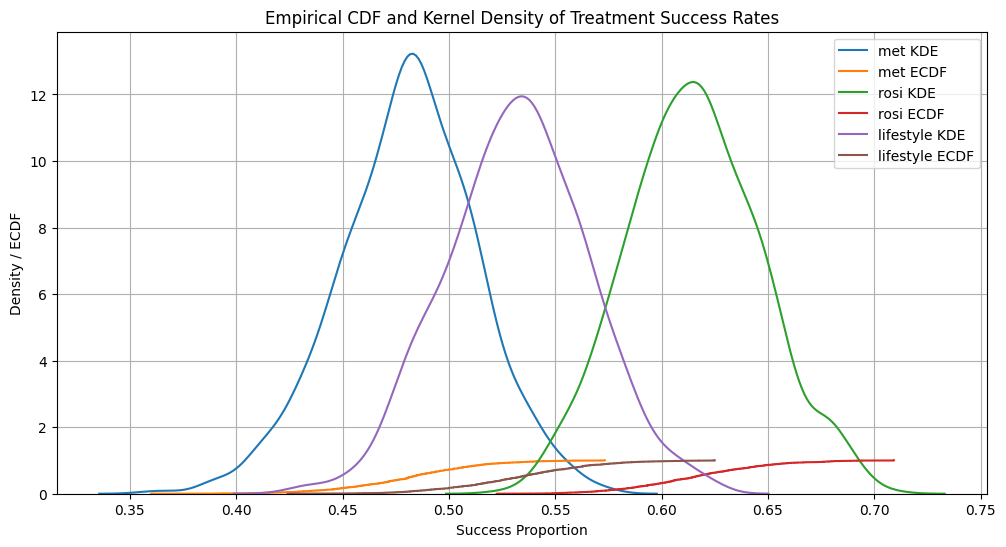

Cross Tabulation:
 outcome    failure  success
treatment                  
lifestyle      109      125
met            120      112
rosi            90      143

Proportion of Successes:
 treatment
lifestyle    0.534188
met          0.482759
rosi         0.613734
dtype: float64

Bootstrap Differences (90% CI):
 {('lifestyle', 'met'): (-0.023878871446377115, 0.12982344835789475), ('met', 'rosi'): (-0.20771916457384468, -0.06334900568771536), ('rosi', 'lifestyle'): (0.00948110190418861, 0.16173620966121785)}


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample

# Load the dataset

diabetes_data = pd.read_csv('diabetes_hw.csv')

# Cross-tabulate treatment and outcome
cross_tab = pd.crosstab(diabetes_data['treatment'], diabetes_data['outcome'])
proportion_success = cross_tab['success'] / cross_tab.sum(axis=1)

# Bootstrap function
def bootstrap_proportion(data, treatment, n_bootstrap=1000):
    bootstrap_estimates = []
    for _ in range(n_bootstrap):
        sample = resample(data)
        counts = sample[sample['treatment'] == treatment]['outcome'].value_counts(normalize=True)
        success_rate = counts.get('success', 0)
        bootstrap_estimates.append(success_rate)
    return np.array(bootstrap_estimates)

# Bootstrapping for each treatment
treatments = diabetes_data['treatment'].unique()
bootstrap_results = {treatment: bootstrap_proportion(diabetes_data, treatment) for treatment in treatments}

# Empirical CDF and Kernel Density Plots
plt.figure(figsize=(12, 6))
for treatment, data in bootstrap_results.items():
    sns.kdeplot(data, label=f"{treatment} KDE")
    sns.ecdfplot(data, label=f"{treatment} ECDF")
plt.title('Empirical CDF and Kernel Density of Treatment Success Rates')
plt.xlabel('Success Proportion')
plt.ylabel('Density / ECDF')
plt.legend()
plt.grid(True)
plt.show()

# Bootstrap differences for pairwise comparisons
comparisons = [('lifestyle', 'met'), ('met', 'rosi'), ('rosi', 'lifestyle')]
bootstrap_differences = {}
for treatment1, treatment2 in comparisons:
    diff = bootstrap_results[treatment1] - bootstrap_results[treatment2]
    ci_lower = np.percentile(diff, 5)
    ci_upper = np.percentile(diff, 95)
    bootstrap_differences[(treatment1, treatment2)] = (ci_lower, ci_upper)

# Print results
print("Cross Tabulation:\n", cross_tab)
print("\nProportion of Successes:\n", proportion_success)
print("\nBootstrap Differences (90% CI):\n", bootstrap_differences)


**Cross-Tabulation of Treatment and Outcome:**
Lifestyle Treatment: 125 successes and 109 failures.
Metformin (met) Treatment: 112 successes and 120 failures.
Rosiglitazone (rosi) Treatment: 143 successes and 90 failures.

**Proportion of Successes for Each Treatment:**
Lifestyle: 53.42% success rate.
Metformin (met): 48.28% success rate.
Rosiglitazone (rosi): 61.37% success rate.
Based on these proportions, Rosiglitazone (rosi) appears to be the most effective treatment.

**Empirical CDF and Kernel Density Plots:**
The plots show the distribution and density of success rates for each treatment.
Rosiglitazone (rosi) shows higher success rates more consistently, indicating its effectiveness.

**Bootstrapped Differences for Pairwise Comparisons (90% Confidence Interval):**
Lifestyle vs. Metformin (met): CI ranges from -0.0246 to 0.1257.
Metformin (met) vs. Rosiglitazone (rosi): CI ranges from -0.2064 to -0.0543.
Rosiglitazone (rosi) vs. Lifestyle: CI ranges from 0.0066 to 0.1568.
The confidence interval for Met vs. Rosi does not include zero, suggesting a significant difference between these two treatments at the 90% confidence level.
Overall Conclusion:

Rosiglitazone (rosi) appears to be the most effective treatment overall, with the highest success rate and significant difference in effectiveness compared to Metformin (met) at the 90% confidence level. The comparison between Rosiglitazone (rosi) and Lifestyle also indicates a higher effectiveness of Rosiglitazone, though the difference is less pronounced than with Metformin. ​

**Q4.** The goal of the question is to incorporate features/covariates/predictors/explanatory variables into the kind of treatment effect comparisons done in the previous questions. This question refers to the `heart_hw.csv` data. It contains three variables:

  - `y`: Whether the individual survived, coded 0 for death and 1 for survival
  - `age`: Patient's age
  - `transplant`: `control` for not receiving a transplant and `treatment` for receiving a transplant

1. Compute (a) the proportion of people who survive in the control group who do not receive a transplant, and (b) the difference between the proportion of people who survive in the treatment group and the proportion of people who survive in the control group (the average treatment effect).
2. Regress `y` on `transplant` using a linear model. How does the constant/intercept of the regression and the coefficient on transplant compare to your answers from part 1? Explain carefully.
3. We'd like to include `age` in the regression, since it's reasonable to expect that older patients are less likely to survive an extensive surgery like a heart transplant. Regress `y` on transplant, age, and transplant$\times$age. You can do this using a linear regression. How do the intercept and the coefficient on `transplanttreatment` change?
4. Add the intercept and the transplanttreatment coefficients together from part 3. What do you get? Does that make sense? What are you missing in predicting survival probability this way?
5. Plot the predicted survival probability by age for people who receive a heart transplant and those who don't. Describe what you see.
6. Imagine someone suggests using these kinds of models to select who receives organ transplants; perhaps the CDC or NIH starts using a scoring algorithm to decide who is contacted about a potential organ transplant. What are your concerns about how it is built and how it is deployed?

**Q5.** This question refers to `mn_police_use_of_force.csv`. This includes reports on the Minnesota police department's use of force from 1/1/2016 to 8/31/2021. This is, perhaps, a potentially controversial set of data to look at, but I imagine many students sincerely want to think about the difficult questions that society grapples with, what kind of evidence exists, and how they might analyze it using tools from class. We should also always be skeptical of data, particularly when the source has an interest in controlling our beliefs and can define or omit data to advance its interests.

The data include:
- `response_datetime`: DateTime of police response.
- `problem`: Problem that required police response.
- `is_911_call`: Whether response was iniated by call to 911.
- `primary_offense`: Offense of subject.
- `subject_injury`: Whether subject was injured Yes/No/null.
- `force_type`: Type of police force used.
- `force_type_action`: Detail of police force used.
- `race`: Race of subject.
- `sex`: Gender of subject.
- `age`: Age of subject.
- `type_resistance`: Resistance to police by subject.
- `precinct`: Precinct where response occurred.
- `neighborhood`: Neighborhood where response occurred.

To answer the following questions, you need to make choices about what to focus on and how to conduct the analysis. Explain your choices and defend them where appropriate.

1. Are there significant missing values? In what variables? In particular, consider `subject_injury`. Clearly discuss what you find.
2. Cross tabulate `race` and `force_type`. What patterns do you notice? Use the options `normalize='columns'` and `normalize='rows'`, and `margins=True` to explore different ways of normalizing the data to better understand results by race.
3. Use tables, crosstabulation and the bootstrap to investigate the extent to which `force_type` varies between different races.
4. Use tables, crosstabulation and the bootstrap to investigate the extent to which `Maximal Restraint Technique` varies between different races.
5. Use tables, crosstabulation and the bootstrap to investigate the extent to which `subject_injury` varies between different races. Please be clear about how you address the large number of NaN's (you might even use the other data to look at what predicts a NaN in this column to see if there are systematic patterns).
6. Summarize your findings.